In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import windrose as wr

from dataclasses import dataclass

In [2]:
path = "../data/vigra.csv"
df = pd.read_csv(path)

In [3]:
df.sample(5)

,Navn,Stasjon,Tid,Vindretning,Middelvind,Lufttemperatur
4223,Vigra,SN60990,10.07.2021 15:00,24,3.1,16.4
1566,Vigra,SN60990,17.03.2021 18:00,229,4.8,3.9
7585,Vigra,SN60990,27.11.2021 17:00,135,5.6,-2.1
4159,Vigra,SN60990,07.07.2021 23:00,33,3.8,15.1
1599,Vigra,SN60990,19.03.2021 03:00,148,1.8,3.5


In [7]:
@dataclass
class WindrosePlot:

    title: str
    wind_direction: pd.Series
    observation: pd.Series
    legend_title: str
    cmap: mpl.cm = mpl.cm.viridis

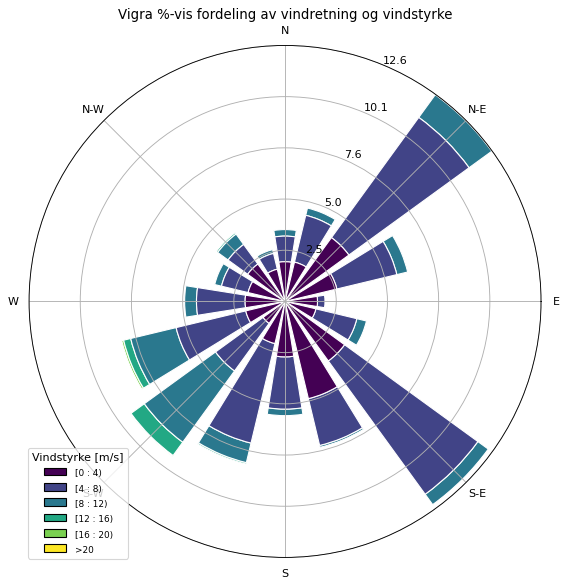

In [10]:
plot = WindrosePlot(
    title="Vigra %-vis fordeling av vindretning og vindstyrke",
    wind_direction=df["Vindretning"],
    observation=df["Middelvind"],
    legend_title="Vindstyrke [m/s]",
    cmap=mpl.cm.viridis
)

plt.hist([0, 1])
plt.close()

ax = wr.WindroseAxes.from_ax()
ax.bar(
    plot.wind_direction,
    plot.observation,
    normed=True,
    opening=0.8,
    edgecolor="white",
    cmap=plot.cmap
)
ax.set_legend(
    title=plot.legend_title,
    loc="lower left",
    decimal_places=0
)
ax.set_title(plot.title)
plt.show()